Modify figures after co-authors' comments.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#mpl.rcParams['xtick.labelsize'] = 7
#mpl.rcParams['ytick.labelsize'] = 7
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# CV scores
modified from `ML_element_17.ipynb` and `prepare_paper_02.ipynb`.

In [2]:
# the best sc
import glob
grid_df = pd.DataFrame()
data_list = []
alg_list = []
pca_list = []

for data_dir in glob.glob('results/r_*_grid_20220120.csv'):
    
    X1 = pd.read_csv(data_dir, index_col=0)

    for mask, pca in zip([X1.param_pca.isna(), ~X1.param_pca.isna()], ['no', 'yes']):
        X2 = X1[mask].reset_index(drop=True)
        grid_df = pd.concat([grid_df, X2.iloc[np.argmax(X2.mean_test_score), :]], axis=1, join='outer')
        data_list.append(data_dir.split('_')[1])
        alg_list.append(data_dir.split('_')[2])
        pca_list.append(pca)

grid_df = grid_df.T
grid_df['data'] = data_list
grid_df['alg'] = alg_list
grid_df['pca'] = pca_list

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_pca,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,param_rf__max_depth,param_rf__n_estimators,param_scaling,param_svc__C,param_svc__gamma,data,alg,pca
3,1.550458,0.218712,0.005439,0.000174,0.1,NaN,"{'lr__C': 0.1, 'pca': None}",0.523349,0.571322,0.543248,...,0.079434,4,NaN,NaN,NaN,NaN,NaN,raw,lr,no
3,1.015444,0.159766,0.00704,0.000952,0.1,PCA(whiten=True),"{'lr__C': 0.1, 'pca': PCA(whiten=True)}",0.513402,0.573458,0.543323,...,0.072596,1,NaN,NaN,NaN,NaN,NaN,raw,lr,yes
5,100.910202,4.312628,3.083748,0.678184,NaN,NaN,"{'pca': None, 'rf__max_depth': 5, 'rf__n_estim...",0.515039,0.58998,0.570078,...,0.087442,1,5,5000,NaN,NaN,NaN,raw,rf,no
7,24.793201,1.035902,2.143548,0.333112,NaN,PCA(whiten=True),"{'pca': PCA(whiten=True), 'rf__max_depth': 10,...",0.511633,0.550157,0.505814,...,0.07147,13,10,1000,NaN,NaN,NaN,raw,rf,yes
24,2.856047,0.270792,1.314926,0.080586,NaN,NaN,"{'pca': None, 'scaling': StandardScaler(), 'sv...",0.596411,0.719259,0.615897,...,0.063259,1,NaN,NaN,StandardScaler(),1.0,0.001,roll,svc,no
17,13.144488,0.825871,2.37145,0.10853,NaN,PCA(whiten=True),"{'pca': PCA(whiten=True), 'scaling': StandardS...",0.627999,0.627036,0.593091,...,0.058442,6,NaN,NaN,StandardScaler(),0.1,0.001,roll,svc,yes
20,14.12607,1.708435,9.673466,0.464898,NaN,NaN,"{'pca': None, 'svc__C': 1.0, 'svc__gamma': 0.001}",0.564751,0.66707,0.543581,...,0.087841,3,NaN,NaN,NaN,1.0,0.001,2d,svc,no
32,2.296071,0.151812,0.830215,0.061374,NaN,"PCA(n_components=50, whiten=True)","{'pca': PCA(n_components=50, whiten=True), 'sv...",0.529885,0.634522,0.619588,...,0.076605,1,NaN,NaN,NaN,100.0,0.001,2d,svc,yes
1,9.669957,1.855004,0.017828,0.001477,0.001,NaN,"{'lr__C': 0.001, 'pca': None}",0.537968,0.626083,0.551949,...,0.082669,10,NaN,NaN,NaN,NaN,NaN,2d,lr,no
0,1.546021,0.026087,0.031302,0.003165,0.0001,"PCA(n_components=50, whiten=True)","{'lr__C': 0.0001, 'pca': PCA(n_components=50, ...",0.609298,0.65571,0.623762,...,0.078838,1,NaN,NaN,NaN,NaN,NaN,2d,lr,yes


In [4]:
eva_df = pd.DataFrame(
    {'data': ['raw', 'rolling', '2d'],
     'accuracy': [0.71, 0.78, 0.75],
     'boundary': [591, 98, 156]}
     )


/home/users/aslee/miniconda3/envs/wasafacies/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


20220406


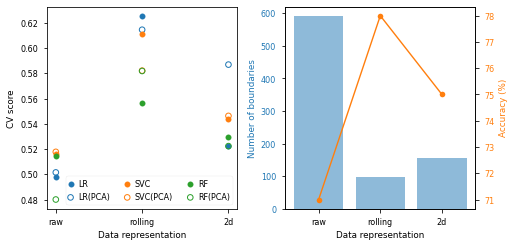

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(7.25, 3.54))

# CV scores
for data in ['raw', 'roll', '2d']:
    # small trick to plot part of legend
    if data == 'roll':
        axes[0].legend(loc='lower right', ncol=3, handlelength=.3)
    for alg, color in zip(['lr', 'svc', 'rf'], ['C0', 'C1', 'C2']):
        # without PCA
        mask = (grid_df.data == data) & (grid_df.alg == alg) & (grid_df.pca == 'no')
        axes[0].scatter(
            data, 
            grid_df.mean_test_score[mask], 
            facecolors=color,
            label=alg.upper())
        # with PCA
        mask = (grid_df.data == data) & (grid_df.alg == alg) & (grid_df.pca == 'yes')
        axes[0].scatter(
            data, 
            grid_df.mean_test_score[mask], 
            facecolors='none', 
            edgecolors=color,
            linewidths=1,
            label='{}(PCA)'.format(alg.upper()))
            
axes[0].set_xticklabels(['raw', 'rolling', '2d'])
axes[0].set_xlabel('Data representation')
axes[0].set_ylabel('CV score')

# bi-axis plot
# distribution
color = 'C0'
axes[1].bar(x=eva_df.data, height=eva_df.boundary, color=color, alpha=.5)
axes[1].set_ylabel('Number of boundaries', c=color)
axes[1].tick_params(axis='y', labelcolor=color)
axes[1].set_xlabel('Data representation')

# error rate in each range of max. probability
color = 'C1'
ax2 = axes[1].twinx()
ax2.plot(eva_df.data, eva_df.accuracy*100, marker='o', c=color)
ax2.set_ylabel('Accuracy (%)', c=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.savefig('results/r_grids+biaxis_{}.png'.format(date))
print(date)

# Comparison between the actual and predicted result
In test set. It's modified from `prepare_paper_02.ipynb`. This time I only show 3 core sections and enlarge it.

In [6]:
y_df = pd.read_csv('results/r_ys_20220120.csv', index_col=0)

In [7]:
from wasafacies import Evaluation
eva = Evaluation()
Facies = eva.get_Facies()
Facies

array(['hsm', 'hcf', 'lcf', 'sf', 'mf', 'la', 'pt', 'so', 'pm', 'pef',
       'mo'], dtype=object)

In [8]:
y_df = pd.concat([
        pd.read_csv('data/info.cleaned.all.csv', index_col=0, usecols=['composite_id', 'section_depth_mm']),
        y_df],
    axis=1, join='inner'
)
y_df

,section_depth_mm,y_raw,y_roll,y_2d,y,core_section
N11_02945,220.0,5,NaN,NaN,4,N11-1
N11_02947,222.0,5,NaN,NaN,4,N11-1
N11_02949,224.0,5,NaN,NaN,4,N11-1
N11_02951,226.0,5,NaN,NaN,4,N11-1
N11_02953,228.0,5,NaN,NaN,4,N11-1
...,...,...,...,...,...,...
VVC20_04735,990.0,7,NaN,NaN,9,VVC20-1
VVC20_04737,992.0,7,NaN,NaN,9,VVC20-1
VVC20_04739,994.0,7,NaN,NaN,9,VVC20-1
VVC20_04741,996.0,7,NaN,NaN,9,VVC20-1


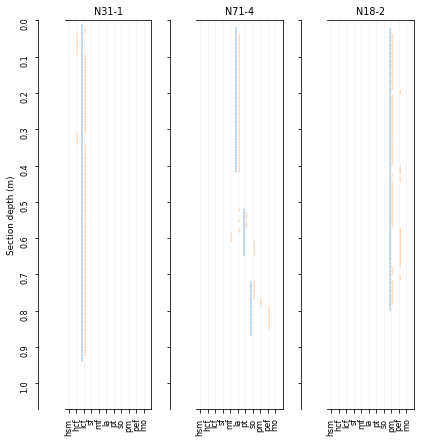

In [20]:
def plot_facies(data_df, section_list, y_pred, Facies, depth):
    """
    data_df is the dataframe having info and labels.
    section_list can be a list of the core sections you want to plot.
    y_pred is the column name of labels you want to plot.
    Faceis is a list of facies names.
    depth is the str indicating the depth you want to plot, 
    "composite_depth_mm" or "section_depth_mm".
    """
    fig, axes = plt.subplots(1, 3, figsize = (6, 6.25), sharey='row') 
    for core_section, ax in zip(section_list, axes):
        X = data_df[data_df.core_section == core_section]        
        ax.scatter(X.y - .2, X[depth]*.001, marker = '_', s = 3, lw = .2, label = 'Description')
        ax.scatter(X[y_pred] + .15, X[depth]*.001, marker = '_', s = 3, lw = .2, label = 'Prediction')
        #ax.set_ylim(ax.get_ylim()[::-1])
        ax.set_ylim(1.07, 0)
        ax.set_yticks(np.linspace(0, 1, 11))
        ax.set_xlim(-.5, len(Facies))
        ax.set_xticks(range(len(Facies)))
        ax.set_xticklabels(Facies, rotation = 90)
        ax.set_title(core_section)
        ax.grid(visible=True, axis='x', color='0.95', lw=.7)
        ax.spines["left"].set_position(("axes", -.31))
        ax.tick_params('y', labelsize = 8, labelrotation = 90)
        
    #axes[0, 0].legend(markerscale=3)
    axes[0].set_ylabel('{} depth (m)'.format(depth.split('_')[0].capitalize()))

    plt.tight_layout()
    fig.savefig('results/r_{}_bysection_{}.png'.format(y_pred, date))

plot_facies(y_df, ['N31-1', 'N71-4', 'N18-2'], 'y_roll', Facies, 'section_depth_mm')

# Model's weights on each feature
It's adopted from ML_element_19.ipynb using the optimal model.

In [2]:
from joblib import load

model = load('models/r_roll_lr_model_20220120.joblib')
coef = model.named_steps['lr'].coef_

In [3]:
from wasafacies import Evaluation, PrepareData

eva = Evaluation()
Facies = eva.get_Facies()

prepare = PrepareData()
facies, id_list = prepare.create_recla()

data_df = prepare.create_roll(facies=facies, id_list=id_list)

20220828


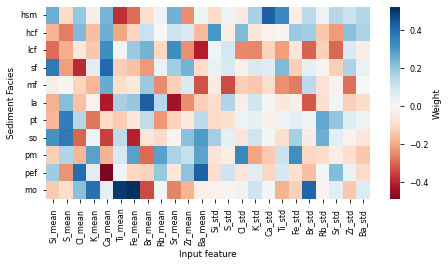

In [ ]:
plt.figure(figsize=(7.25, 3.54))
sns.heatmap(coef, cmap='RdBu', 
    yticklabels=Facies, xticklabels=data_df.columns[:-2],
    center=0,cbar_kws = {'label' : 'Weight'})
plt.yticks(rotation=0, va='center')
plt.xlabel('Input feature')
plt.ylabel('Sediment Facies')
plt.savefig('results/r_coef_roll+lr_{}.png'.format(date))
print(date)